In [28]:
import pandas as pd #import libraries.
import numpy as np

In [29]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [30]:
target = "Strength" #predictors-p and target-t
p = concrete_data.copy()
t = p.pop(target)

In [31]:
p.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [32]:
t.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [33]:
n_cols = p.shape[1]# number of predictors
input_shape = (n_cols,)

In [34]:
from sklearn.model_selection import train_test_split #import librarie for train test.

In [35]:
from tensorflow import keras as K #import the keras package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
def regression_model(network_arch,
                     input_shape,
                     optimizer = "adam",
                     loss = "mean_squared_error",
                    ):

    model = Sequential()
    
    nlayers     = len(network_arch)
    final_layer = "layer_" + str(nlayers)
    
    for k,layer in network_arch.items():
        n_units    = layer.get("n_units")
        activation = layer.get("activation")
        if k == "layer_1":
            model.add(Dense(n_units, activation=activation, input_shape=input_shape))
        elif k == final_layer:
            model.add(Dense(n_units))
        else:
            model.add(Dense(n_units, activation=activation))
    model.compile(optimizer=optimizer, loss=loss)
    
    return model

In [37]:
#10 hidden layer.
model_architecture1 = {"layer_1": {"n_units": 10, "activation": "relu"},
                       "layer_2": {"n_units":  1},
                      }

print()
print("input_shape    = {}".format(input_shape))
print("network_config = {}".format(model_architecture1))
print()


input_shape    = (8,)
network_config = {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}



In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
def train_and_test_several_models(p,t,
                                  test_size,
                                  model_arch,
                                  input_shape,
                                  optimizer,
                                  loss,
                                  niterations,
                                  epochs,
                                  pred_norm = False,
                                  seed = 345,
                                  verbose = 2,
                                 ):
    metric_list = np.zeros(niterations)
    
    print()
    print("Launching {} iterations of".format(niterations))
    print(" - train/test split => test_size = {}".format(test_size))
    if pred_norm:
        print(" - Apply predictors normalization")
    else:
        print(" - No    predictors normalization")
    print(" - model architecture: {}".format(model_arch))
    print(" - model training:")
    print("   * epochs    = {}".format(epochs))
    print("   * optimizer = {}".format(optimizer))
    print("   * loss      = {}".format(loss))
    print()
    
    for i in range(niterations):    
        myseed = seed + i*2 
        p_train, p_test, t_train, t_test = train_test_split(p, t, test_size=test_size, random_state=myseed)
        model = regression_model(network_arch = model_arch,
                                 input_shape = input_shape,
                                 optimizer = optimizer,
                                 loss  = loss)
        if pred_norm: 
            p_train_mean = p_train.mean()
            p_train_std  = p_train.std()
            p_train = (p_train - p_train_mean)/p_train_std
            p_test  = (p_test  - p_train_mean)/p_train_std

        myverbose = 0
        if i == 0:
            myverbose = verbose
            print("Train/test splitting for iteration {}".format(i+1))
            print("  p_train.shape = {}".format(p_train.shape))
            print("  t_train.shape = {}".format(t_train.shape))
            print("  p_test.shape  = {}".format(p_test.shape))
            print("  t_test.shape  = {}".format(t_test.shape))
            print(p_train.head())
            print()
            print("Model summary for iteration {}".format(i+1))
            model.summary()
            print()
            print()
        model.fit(p_train, t_train, epochs=epochs, verbose=verbose)
        t_pred = model.predict(p_test)

        result = np.sqrt(mean_squared_error(t_test,t_pred))
        print("{}: sqrt(mse) = {}".format(i+1,result))
        metric_list[i] = result
    print()
    return metric_list

In [40]:
niterations = 50 
test_size = 0.3 

In [41]:
sq_mse_list_A = train_and_test_several_models(p = p,
                                              t = t,
                                              test_size = test_size,
                                              model_arch = model_architecture1,
                                              input_shape = input_shape,
                                              optimizer = "adam",
                                              loss = "mean_squared_error",
                                              niterations = niterations,
                                              epochs = 50,
                                              seed = 345,
                                              verbose = 0,
                                              pred_norm = False,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - No    predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}
 - model training:
   * epochs    = 50
   * optimizer = adam
   * loss      = mean_squared_error

Train/test splitting for iteration 1
  p_train.shape = (721, 8)
  t_train.shape = (721,)
  p_test.shape  = (309, 8)
  t_test.shape  = (309,)
     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
870   149.0               139.0    109.0  193.0               6.0   
875   155.0               183.0      0.0  193.0               9.0   
488   387.0                20.0     94.0  157.0              14.3   
10    198.6               132.4      0.0  192.0               0.0   
391   397.0                17.2    158.0  167.0              20.8   

     Coarse Aggregate  Fine Aggregate  Age  
870             892.0           780.0   28  
875            1047.0           697.0   28  
488      

In [42]:
mean_sqmse_A = np.mean(sq_mse_list_A)
std_sqmse_A = np.std(sq_mse_list_A)

df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,15.597978,6.18887


In [49]:
figsize = (20,7)
nbins = 20

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_results(result_list,
                 label_list,
                 var_name = "sq(mse)",
                 figsize = (15,10),
                 nbins = 10):
    
    if len(result_list) != len(label_list):
        raise ValueError("lenghts of result_list and label_list has to be the same")
        
    if len(result_list) == 0:
        raise ValueError("lenght of result_list has to be > 0")
        
    color_list = ["b","r","m","y"]
    
    pmin = +1.0e+20
    pmax = -1.0e+20
    for arr in result_list:
        min_tmp = np.amin(arr)
        max_tmp = np.amax(arr)
        
        if pmin > min_tmp:
            pmin = min_tmp
        if pmax < max_tmp:
            pmax = max_tmp
    
    percent = 0.01
    delta = pmax - pmin
    pmin -= percent*delta
    pmax += percent*delta
        
    bins = np.linspace(pmin, pmax, nbins+1) 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    
    porcent = 0.05
    tmax = -1.0e+20
    for i,arr in enumerate(result_list): 
        n,_,_ = ax.hist(x = arr,
                        bins = bins,
                        color = color_list[i],
                        alpha = 0.5,
                        density = False,
                        label = label_list[i]
                       )
        
        if tmax < np.amax(n):
            tmax = np.amax(n)

    ax.legend()
    ax.set_xlim([bins[0],bins[-1]])
    ax.set_ylim([0,tmax*(1.0 + porcent)])
    ax.set_xlabel(var_name)
    ax.set_ylabel('Occurences')
    ax.set_title(var_name + ' distribution')
    
    fig.tight_layout()

    plt.show()

In [ ]:
plot_results(result_list = [sq_mse_list_A],
             label_list  = ["Part A"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)

In [57]:
sq_mse_list_B = train_and_test_several_models(p = p,
                                              t = t,
                                              test_size = test_size,
                                              model_arch = model_architecture1,
                                              input_shape = input_shape,
                                              optimizer = "adam",
                                              loss = "mean_squared_error",
                                              niterations = niterations,
                                              epochs = 50,
                                              seed = 3675,
                                              verbose = 0,
                                              pred_norm = True,
                                             )


Launching 50 iterations of
 - train/test split => test_size = 0.3
 - Apply predictors normalization
 - model architecture: {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}
 - model training:
   * epochs    = 50
   * optimizer = adam
   * loss      = mean_squared_error

Train/test splitting for iteration 1
  p_train.shape = (721, 8)
  t_train.shape = (721,)
  p_test.shape  = (309, 8)
  t_test.shape  = (309,)
       Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
723  0.260617           -0.863998 -0.825639  0.448707         -1.007613   
112  1.477748            1.174001 -0.825639  0.163870          0.870100   
278 -0.292281           -0.863998  1.058232  0.282552         -0.026465   
641 -0.305490           -0.863998 -0.825639 -0.026021         -1.007613   
270 -0.477209           -0.863998  1.110782 -0.405804          0.125781   

     Coarse Aggregate  Fine Aggregate       Age  
723          0.481434        0.718580 -0.271735  
112     

In [58]:
mean_sqmse_B = np.mean(sq_mse_list_B)
std_sqmse_B  = np.std(sq_mse_list_B)

df_results.loc[df_results.shape[0]] = ["B",mean_sqmse_B,std_sqmse_B]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,15.597978,6.188870
1,B,18.298666,2.352314


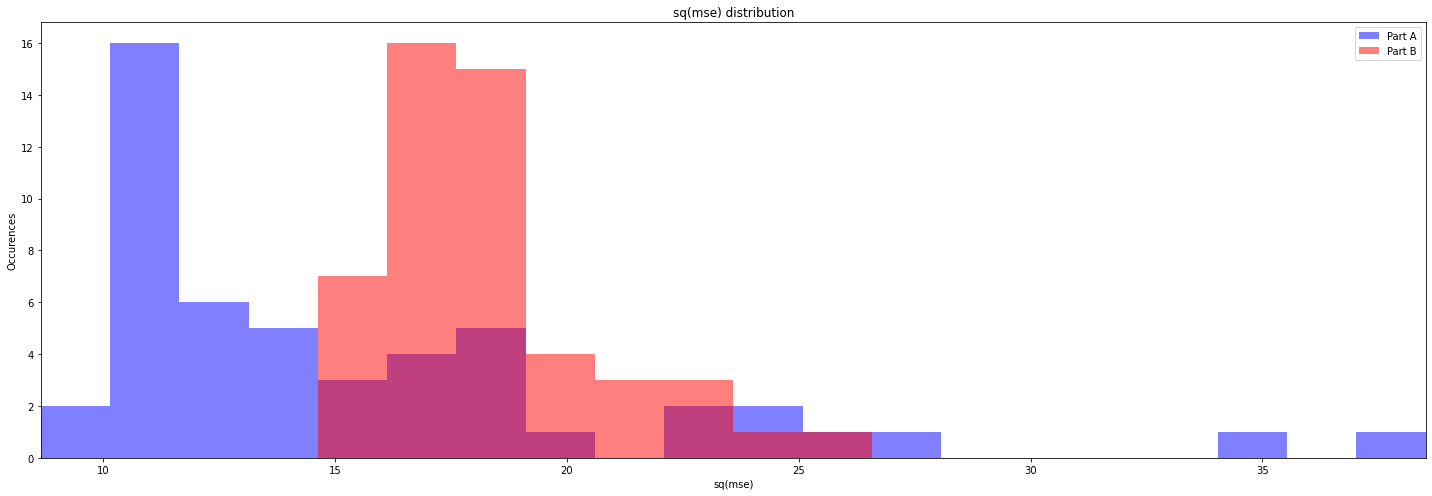

In [59]:
plot_results(result_list = [sq_mse_list_A,sq_mse_list_B],
             label_list  = ["Part A","Part B"],
             var_name = "sq(mse)",
             figsize = figsize,
             nbins = nbins)